# ATMS 523
## using the `eofs` python package

For performing EOF analysis in python, there are several examples.  We'll use the `eofs` package by Andrew Dawson.  It is available on GitHub here: https://github.com/ajdawson/eofs

I install it in my python environment using the instructions in the GitHub repository readme.

`eofs` works directly with `xarray` and allows you to preserve metadata, which makes it easy to work with.  Let's go through an example using Pacific Sea Surface Temperatures that will help us identify the pattern of the El Nino Southern Oscillation in monthly climate data.

In [1]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

from eofs.xarray import Eof
from eofs.examples import example_data_path



In [2]:
# Read SST anomalies using the xarray module. The file contains November-March
# averages of SST anomaly in the central and northern Pacific.
filename = example_data_path('sst_ndjfm_anom.nc')
sst = xr.open_dataset(filename)['sst']
sst

<xarray.DataArray 'sst' (time: 50, latitude: 18, longitude: 30)>
array([[[ 4.318080e-01,           nan, ..., -5.099366e-04, -6.166888e-02],
        [ 3.851656e-02,  1.042517e-01, ..., -1.178146e-01, -1.578676e-01],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       [[ 2.928355e-01,           nan, ..., -3.901250e-01, -5.419934e-01],
        [ 1.990132e-01,  6.390592e-01, ..., -1.983026e-01, -3.549605e-01],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       ...,

       [[ 7.829272e-01,           nan, ..., -1.392927e+00, -1.070007e+00],
        [ 4.601060e-01,  2.474768e-01, ..., -7.000861e-01, -7.082649e-01],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]],

       [[ 5.567895e-01,           nan, ..., -1.788158e-02, -1.602829e-01],
        [ 5.618092e-01,  4.567434e-01, ...,  5.617435e-01,  2.904408e-01],
        ...,
        [          nan,           nan, ...,           nan,           nan],
        [          nan,           nan, ...,           nan,           nan]]])
Coordinates:
  * time       (time) datetime64[ns] 1963-01-15T12:00:00 ... 2012-01-16
  * latitude   (latitude) float32 -22.5 -17.5 -12.5 -7.5 ... 47.5 52.5 57.5 62.5
  * longitude  (longitude) float32 117.5 122.5 127.5 132.5 ... 252.5 257.5 262.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      NDJFM mean SST anomalies

In [3]:
# Create an EOF solver to do the EOF analysis. Square-root of cosine of
# latitude weights are applied before the computation of EOFs.
coslat = np.cos(np.deg2rad(sst.coords['latitude'].values))
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(sst, weights=wgts)


In [4]:
# Retrieve the leading EOF, expressed as the correlation between the leading
# PC time series and the input SST anomalies at each grid point, and the
# leading PC time series itself.
eof1 = solver.eofsAsCorrelation(neofs=2)
pc1 = solver.pcs(npcs=2, pcscaling=1)


Text(0.5, 1.0, 'EOF1 expressed as correlation')

/Users/ecwolff3/opt/anaconda3/envs/py3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


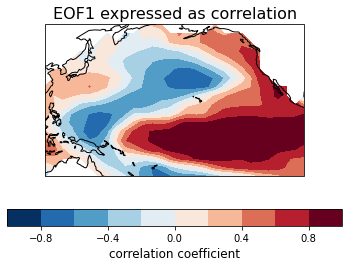

In [5]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[0].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)


Text(0.5, 1.0, 'PC1 Time Series')

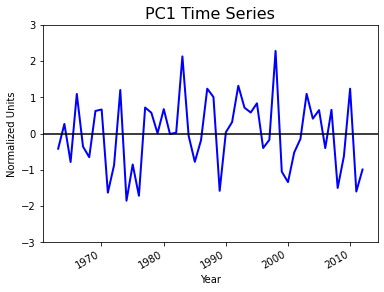

In [6]:
# Plot the leading PC time series.
plt.figure()
pc1[:, 0].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC1 Time Series', fontsize=16)


Text(0.5, 1.0, 'EOF1 expressed as correlation')

/Users/ecwolff3/opt/anaconda3/envs/py3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


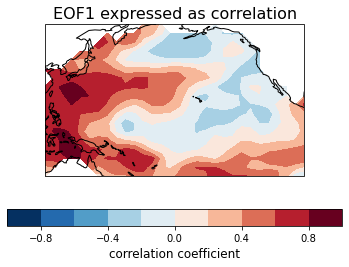

In [7]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-1, 1, 11)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = eof1[1].plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('correlation coefficient', fontsize=12)
ax.set_title('EOF1 expressed as correlation', fontsize=16)


Text(0.5, 1.0, 'PC2 Time Series')

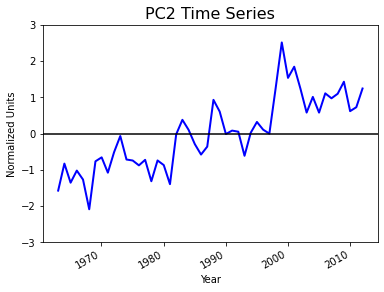

In [8]:
# Plot the second PC time series.
plt.figure()
pc1[:, 1].plot(color='b', linewidth=2)
ax = plt.gca()
ax.axhline(0, color='k')
ax.set_ylim(-3, 3)
ax.set_xlabel('Year')
ax.set_ylabel('Normalized Units')
ax.set_title('PC2 Time Series', fontsize=16)


In [9]:
varfrac = solver.varianceFraction()

(9.660843058243888e-32, 0.4998629400597435)

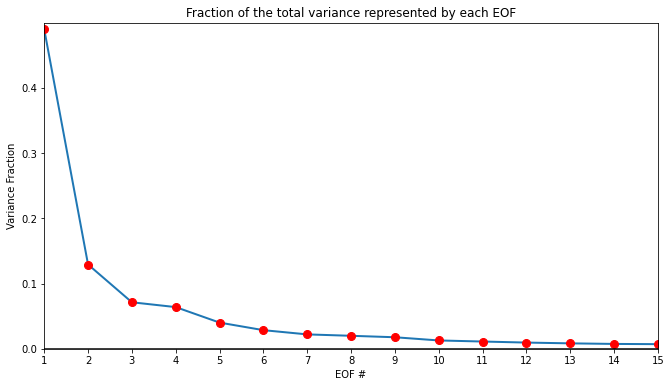

In [10]:
# Plot the fraction of variance explained by each EOF
plt.figure(figsize=(11,6))
eof_num = range(1, 16)
plt.plot(eof_num, varfrac[0:15], linewidth=2)
plt.plot(eof_num, varfrac[0:15], linestyle='None', marker="o", color='r', markersize=8)
plt.axhline(0, color='k')
plt.xticks(range(1, 16))
plt.title('Fraction of the total variance represented by each EOF')
plt.xlabel('EOF #')
plt.ylabel('Variance Fraction')
plt.xlim(1, 15)
plt.ylim(np.min(varfrac), np.max(varfrac)+0.01)

In [11]:
reconstruction = solver.reconstructedField(4)
reconstruction

AttributeError: module 'collections' has no attribute 'Iterable'

NameError: name 'reconstruction' is not defined

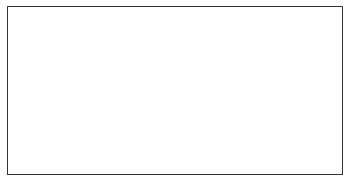

In [12]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-3, 3, 21)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = reconstruction.sel(time='1998-01-15', method='nearest').plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('SST Anomalies (reconstructed)', fontsize=12)


/Users/ecwolff3/opt/anaconda3/envs/py3/lib/python3.10/site-packages/cartopy/mpl/style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


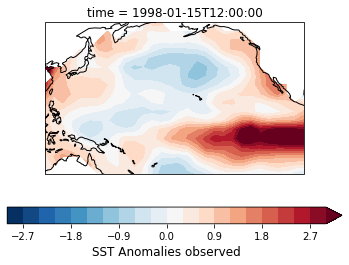

In [13]:
# Plot the leading EOF expressed as correlation in the Pacific domain.
clevs = np.linspace(-3, 3, 21)
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=190))
fill = sst.sel(time='1998-01-15', method='nearest').plot.contourf(ax=ax, levels=clevs, cmap=plt.cm.RdBu_r,
                             add_colorbar=False, transform=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE, color='k', edgecolor='k')
cb = plt.colorbar(fill, orientation='horizontal')
cb.set_label('SST Anomalies observed', fontsize=12)
